In [1]:
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sbn
from matplotlib import animation
from IPython.display import HTML 
from functools import partial

In [2]:
%matplotlib inline

In [87]:
def plot_animation(sample_sizes, samples, func=np.mean):
    fig = plt.figure()
    ax = plt.axes()

    def animate_full(samples, i):
        # w i-tej klatce wyświetl wynik dla i-tego rozmiaru z wymaganych
        smpl = np.asarray(samples[:sample_sizes[i]])
        means = func(smpl, axis=1)
        ax.cla()
        
        r = plt.hist(means, bins=50)
        return (r,)

    animate = partial(animate_full, samples)

    # call the animator. blit=True means only re-draw the parts that have changed.
    anim = animation.FuncAnimation(fig, animate, frames=len(sample_sizes), interval=100, blit=False)
    js = anim.to_jshtml()
    plt.close(anim._fig)
    return HTML(js)

# Simple Introduction

In [91]:
NB_SAMPLES = 100
SAMPLE_SIZE = 1000

(array([  3.,   0.,   5.,   9.,  22.,  21.,  16.,  10.,   7.,   7.]),
 array([ 0.92692634,  0.94003312,  0.9531399 ,  0.96624668,  0.97935346,
         0.99246024,  1.00556702,  1.0186738 ,  1.03178058,  1.04488736,
         1.05799414]),
 <a list of 10 Patch objects>)

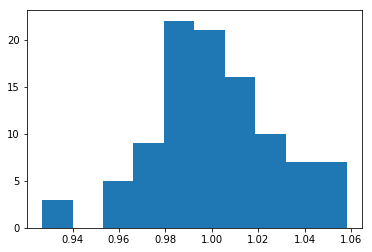

In [92]:
samples = np.asarray([np.random.exponential(size=SAMPLE_SIZE) for _ in range(NB_SAMPLES)])
samples.shape

means = samples.mean(axis=1)
plt.hist(means)

## Animation

In [95]:
MAX_SAMPLE_SIZE = 1000
MIN_SAMPLE_SIZE = 2
STEP = 8
SAMPLE_SIZES = range(MIN_SAMPLE_SIZE, MAX_SAMPLE_SIZE, STEP)
print(len(SAMPLE_SIZES))

samples = [np.random.exponential(size=SAMPLE_SIZE) for i in range(MAX_SAMPLE_SIZE)]

125


In [96]:
plot_animation(SAMPLE_SIZES, samples, np.mean)

# Bernoulli / binomial

Binomial is a set of bernoulli experiments

In [125]:
TRIAL_SIZE = 1000
NB_TRIALS = 100
P = 0.23284

In [126]:
BERNOULLI = False

(array([  16.,   62.,  115.,  260.,  190.,  198.,  107.,   28.,   22.,    2.]),
 array([ 12. ,  14.6,  17.2,  19.8,  22.4,  25. ,  27.6,  30.2,  32.8,
         35.4,  38. ]),
 <a list of 10 Patch objects>)

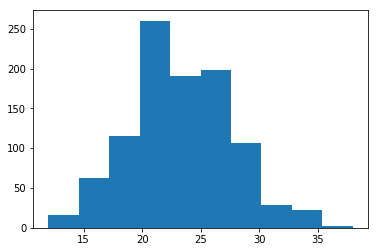

In [127]:
if BERNOULLI:
    samples = []
    for i in range(TRIAL_SIZE):
        s = []
        for _ in range(NB_TRIALS):
            s.append(int(np.random.random()>P))
        samples.append(np.asarray(s))
    sums = np.asarray(samples).sum(axis=1)
else:
    sums=np.random.binomial(NB_TRIALS, P, TRIAL_SIZE)
plt.hist(sums)

## Animation

In [121]:
MAX_TRIAL_SIZE = 1000
MIN_TRIAL_SIZE = 2
STEP = 8
TRIAL_SIZES = range(MIN_TRIAL_SIZE, MAX_TRIAL_SIZE, STEP)
print(len(TRIAL_SIZES))

if BERNOULLI:
    samples = []
    for i in range(MAX_TRIAL_SIZE):
        s = []
        for _ in range(NB_TRIALS):
            s.append(int(np.random.random()>P))
        samples.append(np.asarray(s)) 
else:
    samples = np.random.binomial(NB_TRIALS, P, MAX_TRIAL_SIZE)

125


In [124]:
plot_animation(TRIAL_SIZES, samples, np.sum) if BERNOULLI\
    else plot_animation(TRIAL_SIZES, samples, lambda x, axis: x)

# Multinomial

In [139]:
NB_TRIALS = 100
TRIAL_SIZE = 1000
P = np.random.random(size=4)
P = P / P.sum()
print(P)

[ 0.3406401   0.3373749   0.12534653  0.19663846]


(array([   2.,   33.,   75.,  252.,  251.,  262.,  100.,   21.,    2.,    2.]),
 array([ 18. ,  21.6,  25.2,  28.8,  32.4,  36. ,  39.6,  43.2,  46.8,
         50.4,  54. ]),
 <a list of 10 Patch objects>)

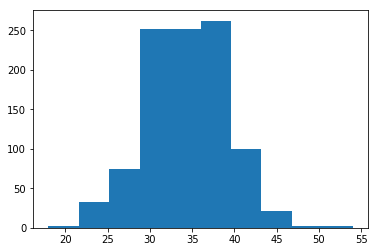

In [141]:
samples = [np.random.multinomial(NB_TRIALS, P) for _ in range(TRIAL_SIZE)]

sums = [x[0] for x in samples]
plt.hist(sums)

## Animation

In [142]:
MAX_TRIAL_SIZE = 1000
MIN_TRIAL_SIZE = 2
STEP = 8
TRIAL_SIZES = range(MIN_TRIAL_SIZE, MAX_TRIAL_SIZE, STEP)
len(TRIAL_SIZES)

125

In [144]:
samples = np.asarray([np.random.multinomial(NB_TRIALS, P) for _ in range(MAX_TRIAL_SIZE)])

In [145]:
plot_animation(TRIAL_SIZES, samples, lambda x, axis: x[:,0])